In [1]:
from datetime import datetime as dt
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
df = pd.read_csv("../../../csv/v2/060_yonge_flow_processed.csv.zip")

In [3]:
df["collectedAt"] = pd.to_datetime(df["collectedAt"], utc=True)
df["collectedAt"] = df.collectedAt.dt.floor(freq="s")
df["year"] = df["collectedAt"].dt.year
df["month"] = df["collectedAt"].dt.month
df["day"] = df["collectedAt"].dt.day
df["hour"] = df["collectedAt"].dt.hour
df["dow"] = df["collectedAt"].dt.day_of_week
df["dow_name"] = df["collectedAt"].dt.day_name()
df["month_name"] = df["collectedAt"].dt.month_name()
df["year_month"] = df["collectedAt"].dt.to_period("M")
df["year_month_day"] = df["collectedAt"].dt.to_period("D")

C:\Users\felip\AppData\Local\Temp\ipykernel_10376\3366148013.py:10: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["year_month"] = df["collectedAt"].dt.to_period("M")
C:\Users\felip\AppData\Local\Temp\ipykernel_10376\3366148013.py:11: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["year_month_day"] = df["collectedAt"].dt.to_period("D")


In [4]:
list(df["month_name"].drop_duplicates())

['July', 'August', 'September', 'October', 'November', 'December', 'January']

# Date & Time

## Span

In [5]:
df = df.sort_values(by="collectedAt")

In [6]:
first_row = df.iloc[0]
last_row = df.iloc[len(df)-1]

first_date = first_row["collectedAt"]
last_date = last_row["collectedAt"]

In [7]:
print("First date",first_date)
print("Last date",last_date)

First date 2022-07-14 12:45:00+00:00
Last date 2023-01-31 23:55:00+00:00


In [8]:
df.sample(5).sort_values(by="collectedAt")

,currentSpeed,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,roadClosure,coordinates,collectedAt,year,month,day,hour,dow,dow_name,month_name,year_month,year_month_day
19582,12,18,84,56,False,"[{'latitude': 43.646886954993356, 'longitude':...",2022-09-20 12:45:00+00:00,2022,9,20,12,1,Tuesday,September,2022-09,2022-09-20
27009,13,18,77,56,False,"[{'latitude': 43.646886954993356, 'longitude':...",2022-10-16 07:50:00+00:00,2022,10,16,7,6,Sunday,October,2022-10,2022-10-16
29347,18,18,56,56,False,"[{'latitude': 43.646886954993356, 'longitude':...",2022-10-24 10:40:00+00:00,2022,10,24,10,0,Monday,October,2022-10,2022-10-24
40493,12,18,84,56,False,"[{'latitude': 43.646886954993356, 'longitude':...",2022-12-02 03:35:00+00:00,2022,12,2,3,4,Friday,December,2022-12,2022-12-02
49605,18,18,56,56,False,"[{'latitude': 43.646886954993356, 'longitude':...",2023-01-02 19:00:00+00:00,2023,1,2,19,0,Monday,January,2023-01,2023-01-02


## Readings per day

In [9]:
readings_per_day = df.groupby(["year", "month", "day"]).count().reset_index()
readings_per_day["date"] = readings_per_day.apply(lambda x: dt.strptime(f"{x.year}-{x.month}-{x.day}", "%Y-%m-%d"), axis=1)

In [10]:
readings_per_day.head()

,year,month,day,currentSpeed,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,roadClosure,coordinates,collectedAt,hour,dow,dow_name,month_name,year_month,year_month_day,date
0,2022,7,14,135,135,135,135,135,135,135,135,135,135,135,135,135,2022-07-14
1,2022,7,15,287,287,287,287,287,287,287,287,287,287,287,287,287,2022-07-15
2,2022,7,16,288,288,288,288,288,288,288,288,288,288,288,288,288,2022-07-16
3,2022,7,17,288,288,288,288,288,288,288,288,288,288,288,288,288,2022-07-17
4,2022,7,18,288,288,288,288,288,288,288,288,288,288,288,288,288,2022-07-18


In [11]:
print("Total days:", len(readings_per_day))

Total days: 202


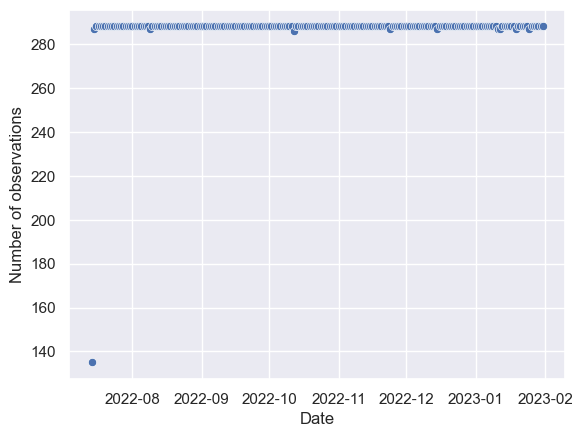

In [13]:
ax = sns.scatterplot(data=readings_per_day,x="date",y="currentSpeed")
ax.set(xlabel="Date",ylabel="Number of observations")
plt.savefig("./plots/000_number_of_readings_per_day.eps", format="eps", bbox_inches="tight")
plt.savefig("./plots/000_number_of_readings_per_day.png", bbox_inches="tight")

### For most days, there were 288 data points collected

## Readings per month

In [14]:
readings_per_month = df.groupby(["year","month_name"]).count().reset_index()[["month_name","currentSpeed"]]
readings_per_month = readings_per_month.rename(columns={"currentSpeed":"readings"})

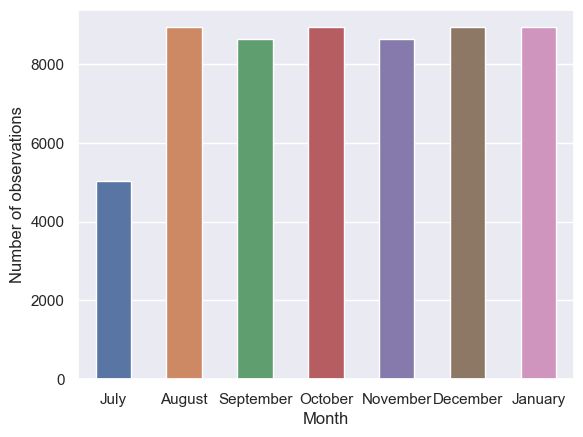

In [15]:
ax = sns.barplot(data=readings_per_month,x="month_name",y="readings", order=list(df["month_name"].drop_duplicates()),width=0.5)
ax.set(xlabel="Month",ylabel="Number of observations")
plt.savefig("./plots/000_number_of_readings_per_month.eps", format="eps", bbox_inches="tight")
plt.savefig("./plots/000_number_of_readings_per_month.png", bbox_inches="tight")

### July has less data because I started collecting on the 14th at 12:45PM